In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('train.csv')
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [ ]:
df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
missingvalues=df.isnull().sum()
print(missingvalues)



ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64


In [ ]:
duplicate_rows=df.duplicated().sum()
print('duplicate rows:',duplicate_rows)

duplicate rows: 0


In [ ]:
constant_column=[col for col in df.columns if df[col].nunique()==1]
print('Constant Columns:',constant_column)

Constant Columns: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [ ]:
df.nunique()

,0
ID,4209
y,2545
X0,47
X1,27
X2,44
...,...
X380,2
X382,2
X383,2
X384,2


In [ ]:
df.drop(columns=constant_column,axis=1,inplace=True)

In [ ]:
constant_column=[col for col in df.columns if df[col].nunique()==1]
print('Constant Columns:',constant_column)

Constant Columns: []


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns=df.select_dtypes(include='object').columns
print('Categorical_Columns:',categorical_columns)


Categorical_Columns: Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')


In [ ]:
label_encoder={}
for column in categorical_columns:
    label_encoder[column]=LabelEncoder()
    df[column]=label_encoder[column].fit_transform(df[column])

In [ ]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1=df.copy()
df1.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=df1.drop('y',axis=1)
y=df1['y']

In [ ]:
print(y.shape)
print(x.shape)

(4209,)
(4209, 365)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error

In [ ]:
print(mean_absolute_error(pred,y_test))

5.7018851032127085


In [ ]:
print(mean_absolute_percentage_error(pred,y_test))

0.057016292951172644


In [ ]:
print(mean_squared_error(y_test,pred))

70.37229650341723


In [ ]:
df1['y'].mean()

100.66931812782134

In [ ]:
residual=y_test-pred

C:\Users\nikit\AppData\Local\Temp\ipykernel_10040\1108040850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: xlabel='y', ylabel='Density'>

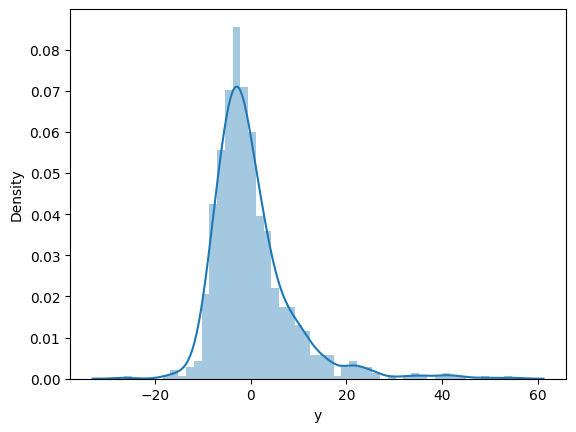

In [ ]:
sns.distplot(residual)

In [ ]:
#pip install xgboost

In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# K-Nearest Neighbors (KNN) Regressor
from sklearn.neighbors import KNeighborsRegressor

# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

# XGBoost Regressor
from xgboost import XGBRegressor

# Support Vector Regressor (SVR)
from sklearn.svm import SVR

# Linear Regression
from sklearn.linear_model import LinearRegression

# Polynomial Regressor (Pipeline for Polynomial Features + Linear Regression)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
models = {
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(),
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "PolynomialRegression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    print(name,"-Mean Squared Error:",mse)

DecisionTree -Mean Squared Error: 139.96435760095014
RandomForest -Mean Squared Error: 76.8451071783254
GradientBoosting -Mean Squared Error: 64.00923192434283
KNeighbors -Mean Squared Error: 176.38226716864608
AdaBoost -Mean Squared Error: 203.61536012119774
XGBoost -Mean Squared Error: 82.0645378464064
SVR -Mean Squared Error: 157.64195080950708
LinearRegression -Mean Squared Error: 70.37229650341723
PolynomialRegression -Mean Squared Error: 4667511.521349693
